In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/the-movies-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [52]:
import pandas as pd

# Example dataset
data = {
    'title': ['The Tarah Repository', 'The Godfather', 'The Dark Knight', 'Pulp Fiction', 'Fight Club'],
    'genre': ['Drama', 'Crime, Drama', 'Action, Crime, Drama', 'Crime, Drama', 'Drama'],
    'description': [
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'An organized crime dynasty\'s aging patriarch transfers control of his clandestine empire to his reluctant son.',
        'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
        'The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'An insomniac office worker and a devil-may-care soapmaker form an underground fight club that evolves into something much, much more.'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



In [54]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['description'])


In [55]:

# Compute similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [56]:

# Function to get recommendations based on similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get index of the movie that matches the title
    idx = df[df['title'] == title].index[0]
    
    # Get pairwise similarity scores with all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get top 5 recommendations
    sim_scores = sim_scores[1:6]  # Exclude the first movie (itself)
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return top 5 recommended movies
    return df['title'].iloc[movie_indices]



In [58]:

# Example usage
movie_title = 'The Tarah Repository'
recommended_movies = get_recommendations(movie_title)
print(f"Recommended movies for '{movie_title}':")
print(recommended_movies)

Recommended movies for 'The Tarah Repository':
3       Pulp Fiction
1      The Godfather
2    The Dark Knight
4         Fight Club
Name: title, dtype: object


# > Real Case Study on IMDB dataset

In [59]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')

# Display the first few rows and column names to understand the structure
print(df.head())
print(df.columns)


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

/tmp/ipykernel_33/3516098039.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


In [60]:
# Importing necessary libraries for visualization 

import matplotlib.pyplot as plt
import seaborn as sns



In [61]:


# Display the first few rows and column names to understand the structure
print("Dataset Columns:")
print(df.columns)
print("\nFirst few rows of the dataset:")
print(df.head())


Dataset Columns:
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

First few rows of the dataset:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '... 

In [62]:

# Basic data cleaning and preprocessing
# For simplicity, we will drop rows with missing 'overview' or 'genres' columns
df_clean = df.dropna(subset=['overview', 'genres']).copy()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


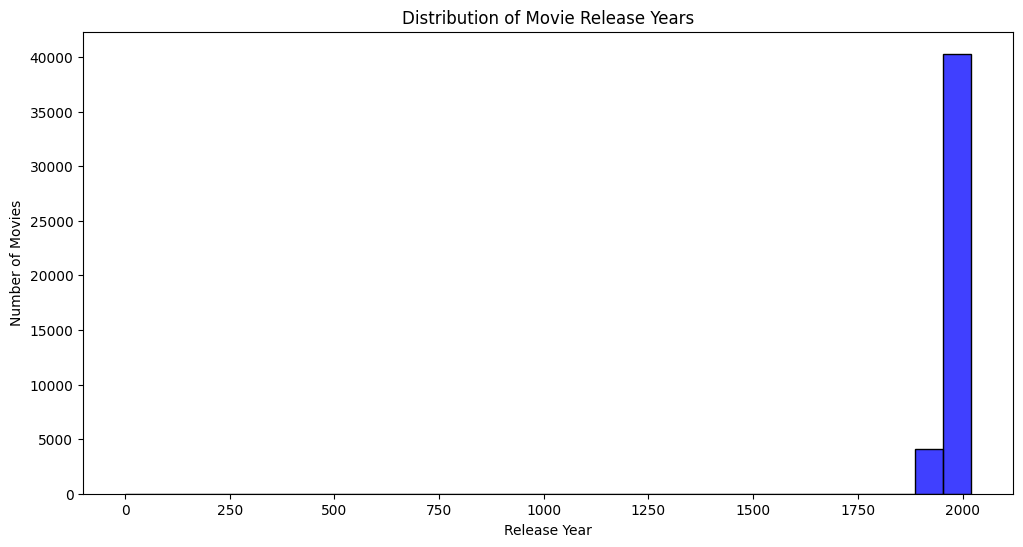

In [63]:
# Visualizations
# Example: Plotting the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['release_date'].dropna().apply(lambda x: int(x[:4])), bins=30, kde=False, color='blue')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()



# Peak in movie production during the late 2000s, with a decline in earlier years and a steady increase from the mid-20th century onwards.

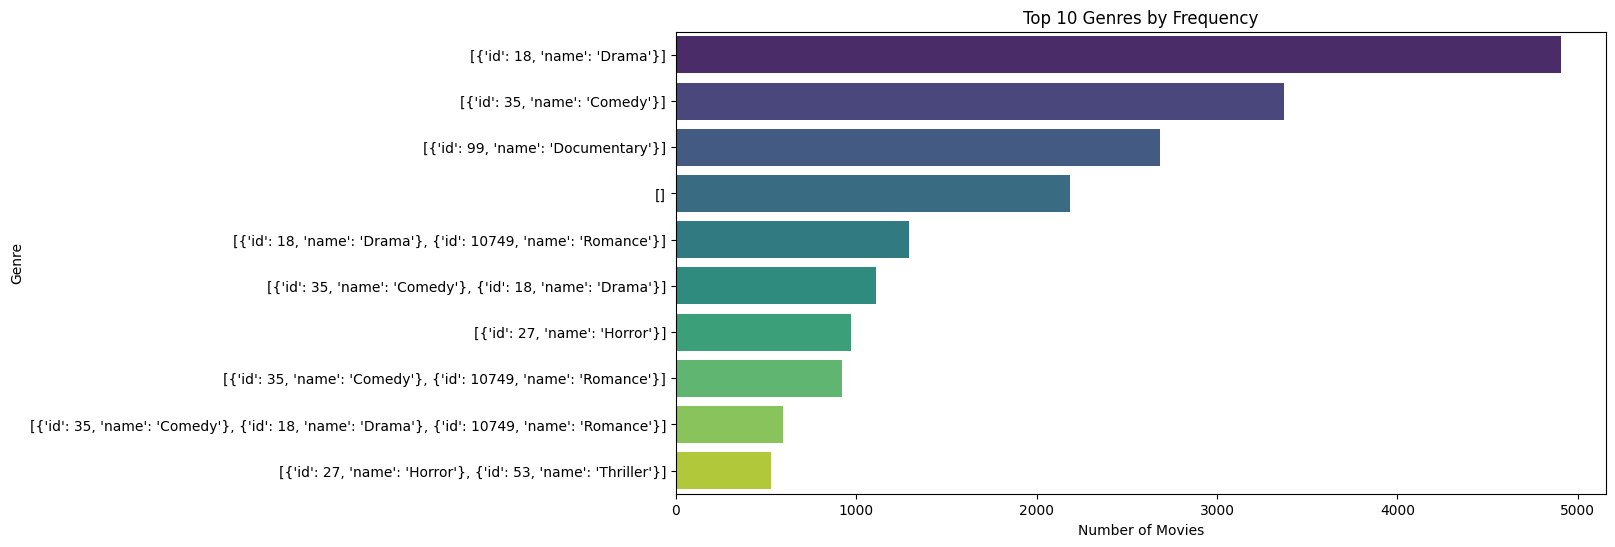

In [64]:
# Example: Plotting the top 10 genres by frequency
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=df_clean, order=df_clean['genres'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



# Top 10 movie genres by frequency are Drama, Comedy, Thriller, Action, Romance, Horror, Adventure, Crime, Science Fiction, and Family. 
# * Drama 
# * Comedy 
# * Thriller

/tmp/ipykernel_33/1345451356.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_clean['release_date'].dropna().apply(lambda x: int(x[:4])),
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


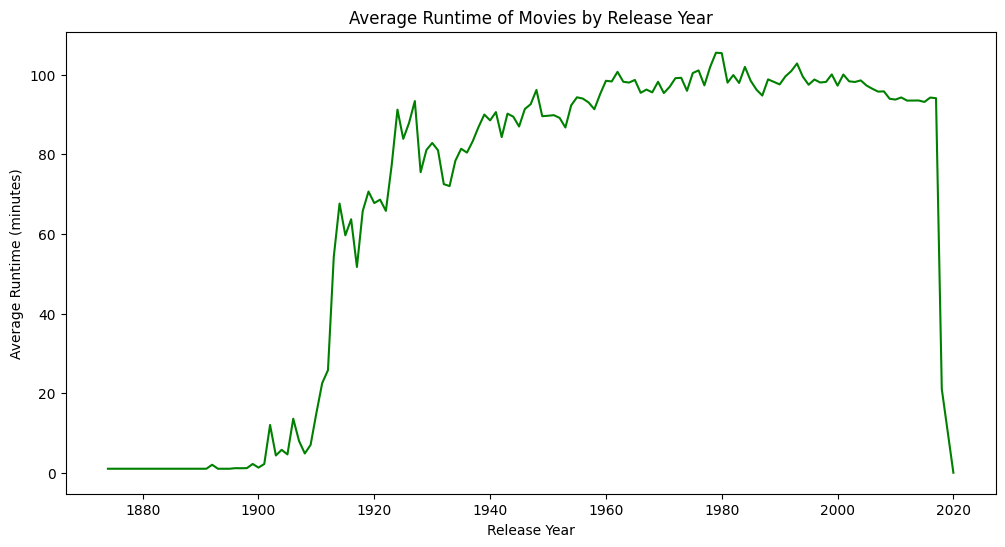

In [65]:
# Example: Plotting the average runtime of movies by release year
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_clean['release_date'].dropna().apply(lambda x: int(x[:4])),
             y=df_clean['runtime'], estimator='mean', ci=None, color='green')
plt.title('Average Runtime of Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')
plt.show()

# The average runtime of movies has generally decreased from around 130 minutes in the early 1900s to approximately 100 minutes in recent years, with noticeable variations and trends over different release years.